# Customer Churn Prediction

#### Task-Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

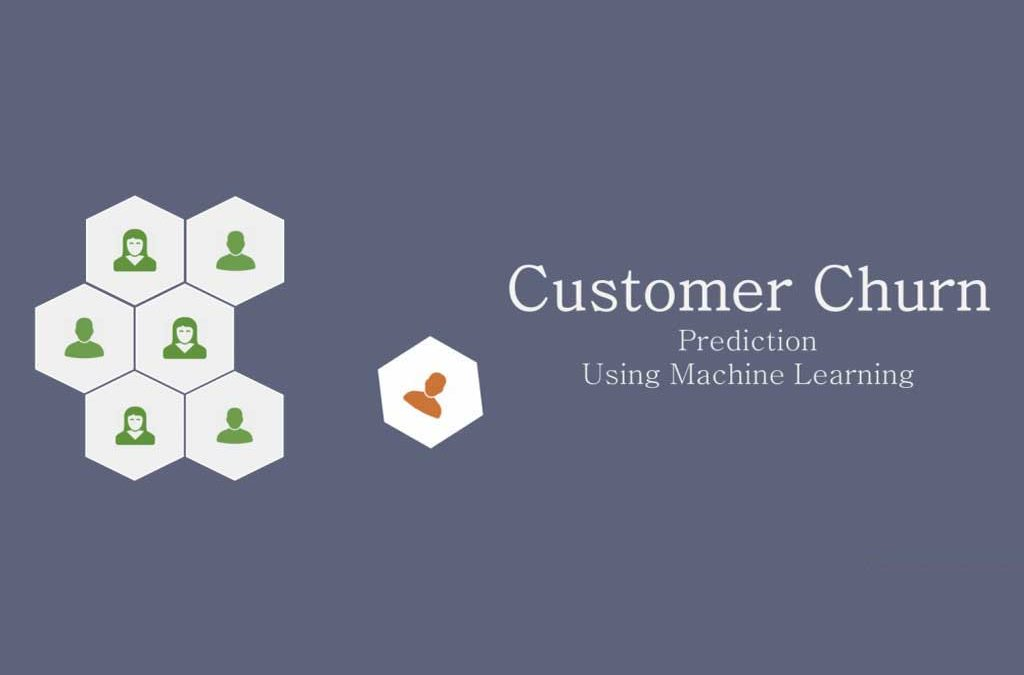

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
sp=pd.read_csv("C:/Users/admin/git/Churn_Modelling.csv")

In [3]:
sp

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Dataset Details

In [4]:
sp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
sp.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
sp.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2585,2586,15612030,Udegbulam,724,France,Male,28,9,0.0,2,1,1,100240.2,0


In [7]:
sp.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
sp.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
sp.shape

(10000, 14)

In [11]:
sp.size

140000

In [12]:
sp.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
sp.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Data Cleaning

In [14]:
sp.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
sp['RowNumber'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64)

In [16]:
sp['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)

In [17]:
sp['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [18]:
sp['CreditScore'].unique

<bound method Series.unique of 0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64>

In [19]:
sp['Geography'].unique

<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [20]:
sp['Gender'].unique

<bound method Series.unique of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>

In [21]:
sp['Age'].unique

<bound method Series.unique of 0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64>

In [22]:
sp['Tenure'].unique

<bound method Series.unique of 0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64>

In [23]:
sp['Balance'].unique

<bound method Series.unique of 0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64>

In [24]:
sp['NumOfProducts'].unique

<bound method Series.unique of 0       1
1       1
2       3
3       2
4       1
       ..
9995    2
9996    1
9997    1
9998    2
9999    1
Name: NumOfProducts, Length: 10000, dtype: int64>

In [25]:
sp['HasCrCard'].unique

<bound method Series.unique of 0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasCrCard, Length: 10000, dtype: int64>

In [26]:
sp['IsActiveMember'].unique

<bound method Series.unique of 0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: IsActiveMember, Length: 10000, dtype: int64>

In [27]:
sp['EstimatedSalary'].unique

<bound method Series.unique of 0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64>

In [28]:
sp['Exited'].unique

<bound method Series.unique of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [29]:
#dropping unnecessary columns
sp.drop(['RowNumber', 'CustomerId', 'Surname','Gender'],axis='columns',inplace=True)

In [30]:
sp

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0
9996,516,France,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [31]:
sp.sum().isnull()

CreditScore        False
Geography          False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [32]:
sp.isnull().sum()

CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


###  Converting categorical values to Categorical Data

In [34]:
sp['Geography']=sp['Geography'].astype('category')
sp['Geography']=sp['Geography'].cat.codes

In [35]:
sp.dtypes

CreditScore          int64
Geography             int8
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Importing Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Splitting the data into features
X=sp[['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
Y=sp[['Exited']]

In [38]:
X

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,2,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64
9996,516,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,36,7,0.00,1,0,1,42085.58
9998,772,1,42,3,75075.31,2,1,0,92888.52


In [39]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [40]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
from sklearn.metrics import accuracy_score,classification_report


In [41]:
X_train

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,32,6,0.00,2,1,1,179093.26
1561,632,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,24,3,114739.92,1,1,0,85891.02
6087,561,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05
5191,682,0,58,1,0.00,1,1,1,706.50
5390,735,0,38,1,0.00,3,0,0,92220.12
860,667,0,43,8,190227.46,1,1,0,97508.04


In [42]:
Y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [43]:
X_test

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,43,1,0.00,2,1,1,146379.30
1731,601,2,44,4,0.00,2,1,0,58561.31
4742,506,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...
6412,602,1,53,5,98268.84,1,0,1,45038.29
8285,609,0,25,10,0.00,1,0,1,109895.16
7853,730,0,47,7,0.00,1,1,0,33373.26
1095,692,0,29,4,0.00,1,1,0,76755.99


In [44]:
Y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


### Logistic Regression

In [45]:
LRmodel=LogisticRegression()
LRmodel.fit(X_train,Y_train)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
LRmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
LRmodel.score(X_test,Y_test)

0.8005

In [49]:
predictions=LRmodel.predict(X_test)
accuracy=accuracy_score(Y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.8005


In [50]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



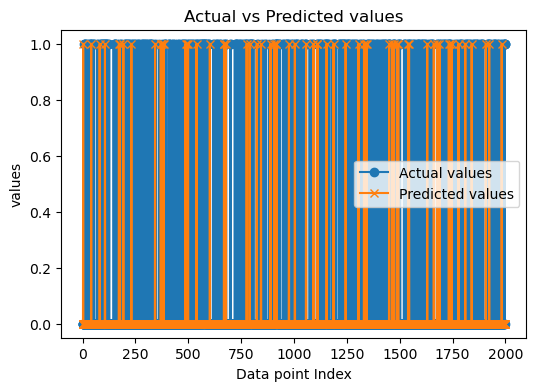

In [51]:
index=range(len(Y_test))
plt.figure(figsize=(6,4))
plt.plot(index,Y_test,label='Actual values',marker='o')
plt.plot(index,predictions,label='Predicted values',marker='x')
plt.xlabel('Data point Index')
plt.ylabel('values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

### Random Forests

In [52]:
RFmodel=RandomForestClassifier()
RFmodel.fit(X_train,Y_train)

C:\Users\admin\3D Objects\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [53]:
RFmodel.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
RFmodel.score(X_test,Y_test)

0.8685

In [55]:
predictions=RFmodel.predict(X_test)
accuracy=accuracy_score(Y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.8685


In [56]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



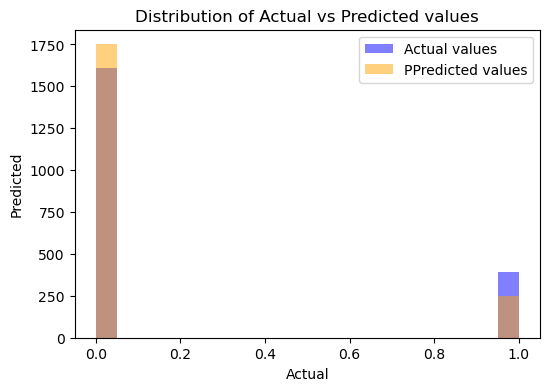

In [57]:
#Creating a histogram of actual and predicted values
plt.figure(figsize=(6,4))
plt.hist(Y_test,bins=20,alpha=0.5,label='Actual values',color='Blue')
plt.hist(predictions,bins=20,alpha=0.5,label='PPredicted values',color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Distribution of Actual vs Predicted values")
plt.legend()
plt.show()

### DecisionTree Classifier

In [58]:
DTmodel=DecisionTreeClassifier()
DTmodel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
DTmodel.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
DTmodel.score(X_test,Y_test)

0.787

In [61]:
predictions=DTmodel.predict(X_test)
accuracy=accuracy_score(Y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.787


In [62]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
from sklearn.metrics import confusion_matrix

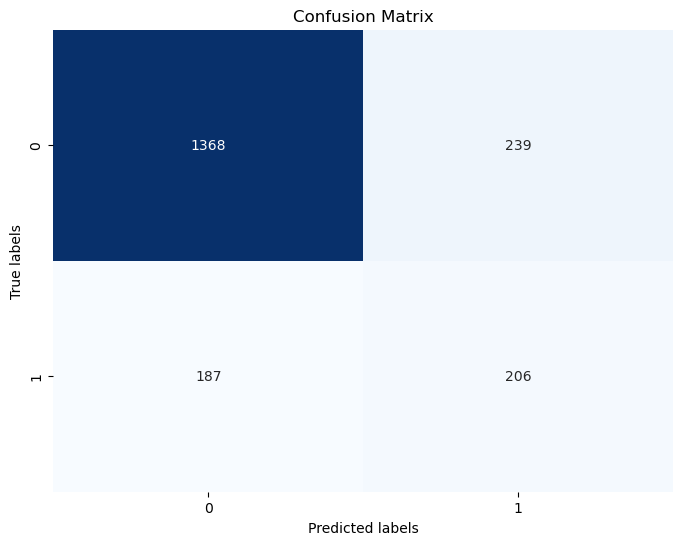

In [65]:
conf_matrix=confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("Confusion Matrix")
plt.show()

## Total score

### Logistic Regression

Accuracy: 0.8005
    
                  precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000


### Random Forests

Accuracy: 0.8685

      precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

    
    

### Decision Tree Classifier

Accuracy: 0.787

         precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

    